<a href="https://colab.research.google.com/github/jassriver/ufal_machine_learning/blob/master/Atividade_da_Semana_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados de consumo de álcool por estudantes**


*   Dataset com dados referentes ao consumo de álcool por estudantes do ensino secundário
*   [Student Alcohol Consumption](https://www.kaggle.com/uciml/student-alcohol-consumption)
*   O csv usado nesse teste é o "student-mat.csv"

**Montando o ambiente no Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# **1. Importando as bibliotecas necessárias**

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Leitura dos dados na memória utilizando a biblioteca Pandas**

In [106]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/semana_1/datasets/student-mat.csv')
dados.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# **3. Limpeza e organização dos dados**

In [107]:
dados = dados.dropna()

In [108]:
dados = dados.drop(columns=['school', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'romantic', 'absences', 'G1', 'G2', 'G3'])
dados.head()

,sex,age,address,famsize,Pstatus,internet,famrel,freetime,goout,Dalc,Walc,health
0,F,18,U,GT3,A,no,4,3,4,1,1,3
1,F,17,U,GT3,T,yes,5,3,3,1,1,3
2,F,15,U,LE3,T,yes,4,3,2,2,3,3
3,F,15,U,GT3,T,yes,3,2,2,1,1,5
4,F,16,U,GT3,T,no,4,3,2,1,2,5


In [109]:
# Troca o tipo de alguns atributos por um tipo numerico
dados['sex'] = dados['sex'].replace(['F', 'M'], [0, 1])
dados['address'] = dados['address'].replace(['U', 'R'], [0, 1])
dados['famsize'] = dados['famsize'].replace(['LE3', 'GT3'], [0, 1])
dados['Pstatus'] = dados['Pstatus'].replace(['T', 'A'], [0, 1])

# printa as primeiras linhas para checar
dados.head()

,sex,age,address,famsize,Pstatus,internet,famrel,freetime,goout,Dalc,Walc,health
0,0,18,0,1,1,no,4,3,4,1,1,3
1,0,17,0,1,0,yes,5,3,3,1,1,3
2,0,15,0,0,0,yes,4,3,2,2,3,3
3,0,15,0,1,0,yes,3,2,2,1,1,5
4,0,16,0,1,0,no,4,3,2,1,2,5


# **4. Análise Preliminar dos dados**

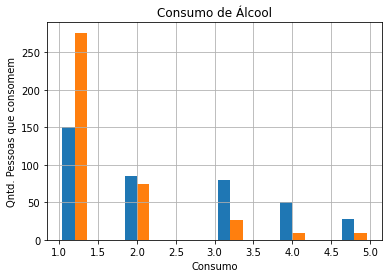

In [110]:
# Verificando as ocorrências do nível de consumo
plt.hist([dados.Walc, dados.Dalc])
plt.xlabel('Consumo')
plt.ylabel('Qntd. Pessoas que consomem')
plt.title('Consumo de Álcool')
plt.grid(True)
plt.show()



*   O consumo de álcool é baixo em dias úteis, com raros casos onde passa de baixo pra um pouco alto e alto.
*   O consumo de álcool varia de muito pouco pra alto em pouquíssimos casos no fim de semana.



In [111]:
# Divide o dataframe entre meninos e meninas
dadosMeninos = dados[dados['sex'] == 1].drop(columns=['sex']).reset_index(drop=True)
dadosMeninas = dados[dados['sex'] == 0].drop(columns=['sex']).reset_index(drop=True)

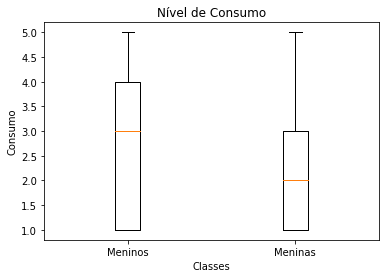

In [112]:
# Boxplot comparando o sexo e o nível de consumo de álcool
plt.boxplot([dadosMeninos.Walc, dadosMeninas.Walc], labels=['Meninos', 'Meninas'])
plt.xlabel('Classes')
plt.ylabel('Consumo')
plt.title('Nível de Consumo')
plt.show()

*   É possível notar que os meninos bebem mais que as meninas
*   Também é possível notar que, mesmo que bebam, a maioria não é num nível muito alto (5), ficando até o nível (4) no máximo

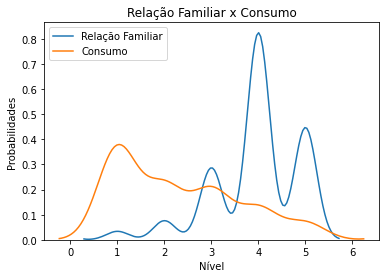

In [113]:
# Distribuição de probabilidade comparando a relação familiar com o consumo
sns.distplot(dados.famrel, hist=False, rug=False,label='Relação Familiar')
sns.distplot(dados.Walc, hist=False, rug=False,label='Consumo')
plt.xlabel('Nível')
plt.ylabel('Probabilidades')
plt.title('Relação Familiar x Consumo')
plt.show()

**Com esse plot é possível ver que a probabilidade de alguém beber no fim de semana com a relação familiar boa é menor do que a de alguém beber com a relação familiar ruim**

# **5. Correlações**

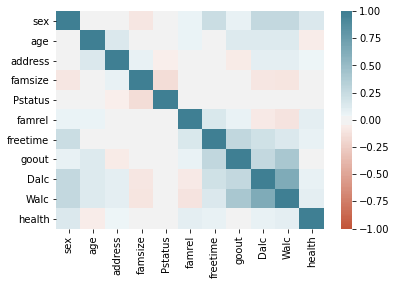

In [114]:
# Salva a Correlacao entre os atributos em uma var
corr = dados.corr()

# Plota o coeficiente de correlacao em um mapa de calor
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

**É possível notar que quase não há correlação positiva entre os atributos**

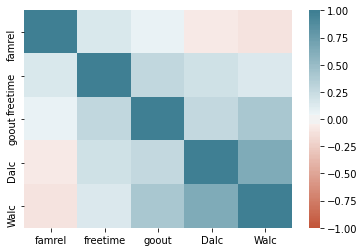

In [115]:
# Correlaciona apenas os que tem uma correlacao mais visivel
corr2 = dados[['famrel', 'freetime', 'goout', 'Dalc', 'Walc']].corr()
sns.heatmap(corr2,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

**Com exceção dos atributos de**


*   Tempo livre e renda familiar.
*   Sair com amigos e beber, tanto em fins de semanas como em dias uteis
*   Sair e ter tempo livre
*   Beber em dias úteis e beber em fins de semana 



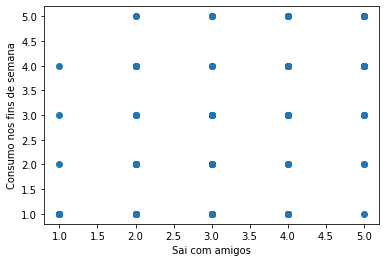

In [116]:
# Plotando as correlações entre sair com amigos e beber nos fins de semana (Somente meninos)
plt.scatter(dadosMeninos.goout, dadosMeninos.Walc)
plt.xlabel('Sai com amigos')
plt.ylabel('Consumo nos fins de semana')
plt.show()

**Nota-se que o consumo só é alto (y5) quando o individuo sai com amigos pelo menos um pouco regularmente (x2), mas, não necessariamente sair com os amigos indica que o individuo tem o nível de consumo muito alto, como o (x5,y1) indica**

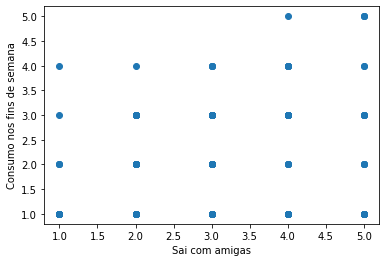

In [117]:
# Plotando as correlações entre sair com amigos e beber nos fins de semana (Somente meninas)
plt.scatter(dadosMeninas.goout, dadosMeninas.Walc)
plt.xlabel('Sai com amigas')
plt.ylabel('Consumo nos fins de semana')
plt.show()

**Para as meninas, é possível notar que elas só começam a beber muito quando saem muito com as amigas, sair "mais ou menos" indica um consumo um pouco elevado, mas não chega a ser o "máximo" da escala**

**Novamente, sair muito com as amigas também não indica que o individuo tem o consumo muito alto.**